# **Classification of Dog Breeds using Convolutional Neural Networks (CNN) **

One of my favourite problems that AI can solve is classification and processing of images, which forms the basis of facial recognition, AI generated images, driverless cars' navigation, and many other AI algorithms.


I worked on classification of black and white simple images during courses, so I challenged myself to process coloured, complex and bigger images that an AI engineer encounters daily.

The reason why this model looks into dog breeds is because as a dog owner I am very familiar with recognition of dog breeds.
Furthermore, it was quite easy to find relevant datasets on Kaggle.


I used the following dataset for this model:
https://www.kaggle.com/datasets/madibokishev/doges-77-breeds




## Setting up my work environment

Simple fast set up of Google's GPU RAM, which allowed me to check the  availaibility of resources.

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct  4 11:24:21 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 54.8 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
import tensorflow as tf

In [ ]:
print(tf.__version__)

2.13.0


In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Activation, Dropout, Flatten, MaxPooling2D, BatchNormalization

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data

I stopped splitting the folder of images (22 GB originally) to get 2 GB of images for the model.

Initially there were 77 dog breeds in the dataset, but I removed over half of them since they had insufficient data (very few images) or images in the wrong format.

I found nice quick code to check if any images were corrupted or wrong format in every dog class.
Also removed certain classes (breeds) of dogs, if they had <200 images, or were missing from the test directory generated by train_test_split.

Kept around 20 dog breeds that were sufficiently anatomically distinct from each other so that the algorithm could classify them accurately.
Removed any images with wrong format from those 20 dog breed classes.

I initially attempted to transfer data from Google Drive, but transfer item from Drive to Colab was too long and each epoch would take 5 hours, not really feasible.
I decided to upload test and train directories as zip.




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/dog_images/val.zip" -d "/content"

Archive:  /content/drive/MyDrive/dog_images/val.zip
   creating: /content/val/
  inflating: /content/__MACOSX/._val  
   creating: /content/val/Toy_Poodle/
  inflating: /content/__MACOSX/val/._Toy_Poodle  
   creating: /content/val/Welsh_Springer_Spaniel/
  inflating: /content/__MACOSX/val/._Welsh_Springer_Spaniel  
  inflating: /content/val/.DS_Store  
  inflating: /content/__MACOSX/val/._.DS_Store  
   creating: /content/val/Basenji/
  inflating: /content/__MACOSX/val/._Basenji  
   creating: /content/val/Chow_Chow/
  inflating: /content/__MACOSX/val/._Chow_Chow  
   creating: /content/val/Chihuahua/
  inflating: /content/__MACOSX/val/._Chihuahua  
   creating: /content/val/Afghan_Hound/
  inflating: /content/__MACOSX/val/._Afghan_Hound  
   creating: /content/val/Doberman/
  inflating: /content/__MACOSX/val/._Doberman  
   creating: /content/val/Norwegian_Elkhound/
  inflating: /content/__MACOSX/val/._Norwegian_Elkhound  
   creating: /content/val/American_Staffordshire_Terrier/
  i

In [ ]:
!unzip "/content/drive/MyDrive/dog_images/test.zip" -d "/content"

Archive:  /content/drive/MyDrive/dog_images/test.zip
   creating: /content/test/
  inflating: /content/__MACOSX/._test  
   creating: /content/test/Toy_Poodle/
  inflating: /content/__MACOSX/test/._Toy_Poodle  
   creating: /content/test/Welsh_Springer_Spaniel/
  inflating: /content/__MACOSX/test/._Welsh_Springer_Spaniel  
   creating: /content/test/Basenji/
  inflating: /content/__MACOSX/test/._Basenji  
   creating: /content/test/Chow_Chow/
  inflating: /content/__MACOSX/test/._Chow_Chow  
   creating: /content/test/Chihuahua/
  inflating: /content/__MACOSX/test/._Chihuahua  
   creating: /content/test/Afghan_hound/
  inflating: /content/__MACOSX/test/._Afghan_hound  
   creating: /content/test/Doberman/
  inflating: /content/__MACOSX/test/._Doberman  
   creating: /content/test/Norwegian_Elkhound/
  inflating: /content/__MACOSX/test/._Norwegian_Elkhound  
   creating: /content/test/American_Staffordshire_Terrier/
  inflating: /content/__MACOSX/test/._American_Staffordshire_Terrier  

In [ ]:
!unzip "/content/drive/MyDrive/dog_images/train.zip" -d "/content"

Archive:  /content/drive/MyDrive/dog_images/train.zip
   creating: /content/train/
  inflating: /content/__MACOSX/._train  
   creating: /content/train/Toy_Poodle/
  inflating: /content/__MACOSX/train/._Toy_Poodle  
   creating: /content/train/Welsh_Springer_Spaniel/
  inflating: /content/__MACOSX/train/._Welsh_Springer_Spaniel  
  inflating: /content/train/.DS_Store  
  inflating: /content/__MACOSX/train/._.DS_Store  
   creating: /content/train/Basenji/
  inflating: /content/__MACOSX/train/._Basenji  
   creating: /content/train/Chow_Chow/
  inflating: /content/__MACOSX/train/._Chow_Chow  
   creating: /content/train/Chihuahua/
  inflating: /content/__MACOSX/train/._Chihuahua  
   creating: /content/train/Afghan_Hound/
  inflating: /content/__MACOSX/train/._Afghan_Hound  
   creating: /content/train/Doberman/
  inflating: /content/__MACOSX/train/._Doberman  
   creating: /content/train/Norwegian_Elkhound/
  inflating: /content/__MACOSX/train/._Norwegian_Elkhound  
   creating: /conte

In [ ]:
import shutil

In [ ]:
test_path = '/content/test'
train_path = '/content/train'
val_path = '/content/val'

In [ ]:
test_path

'/content/test'

In [ ]:
import os

In [ ]:
os.listdir(val_path)

['Afghan_Hound',
 'Norwegian_Elkhound',
 'Chihuahua',
 'Kuvasz',
 'French_Bulldog',
 'Bernese_Mountain_Dog',
 'Basenji',
 'Siberian_Husky',
 'German_Shepherd',
 'Border_Collie',
 'Labrador_Retriever',
 'Toy_Poodle',
 'Chow_Chow',
 'Great_Dane',
 'Miniature_Poodle',
 '.DS_Store',
 'Dingo',
 'Doberman',
 'Welsh_Springer_Spaniel',
 'Golden_Retriever',
 'American_Staffordshire_Terrier']

In [ ]:
os.listdir(test_path)

['Norwegian_Elkhound',
 'Chihuahua',
 'Kuvasz',
 'French_Bulldog',
 'Bernese_Mountain_Dog',
 'Basenji',
 'Siberian_Husky',
 'German_Shepherd',
 'Border_Collie',
 'Labrador_Retriever',
 'Toy_Poodle',
 'Chow_Chow',
 'Great_Dane',
 'Miniature_Poodle',
 'Dingo',
 'Doberman',
 'Welsh_Springer_Spaniel',
 'Afghan_hound',
 'Golden_Retriever',
 'American_Staffordshire_Terrier']

In [ ]:
os.listdir(train_path)

['Afghan_Hound',
 'Norwegian_Elkhound',
 'Chihuahua',
 'Kuvasz',
 'French_Bulldog',
 'Bernese_Mountain_Dog',
 'Basenji',
 'Siberian_Husky',
 'German_Shepherd',
 'Border_Collie',
 'Labrador_Retriever',
 'Toy_Poodle',
 'Chow_Chow',
 'Great_Dane',
 'Miniature_Poodle',
 '.DS_Store',
 'Dingo',
 'Doberman',
 'Welsh_Springer_Spaniel',
 'Golden_Retriever',
 'American_Staffordshire_Terrier']

In [ ]:
os.listdir(train_path+'/Labrador_Retriever/')[0]

'n02099712_328.jpg'

In [ ]:
os.listdir(test_path + '/Border_Collie/')[0]

'n02106166_2595.jpg'

In [ ]:
len(os.listdir(train_path+'/Labrador_Retriever/'))
len(os.listdir(test_path+'/Labrador_Retriever/'))

18

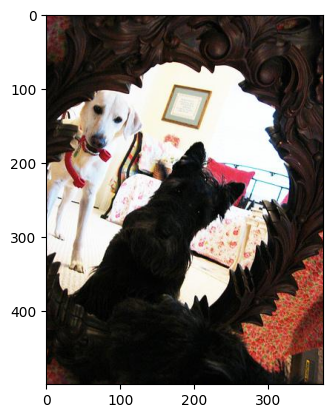

In [ ]:
lab_im_path = train_path+'/Labrador_Retriever/'+os.listdir(train_path+'/Labrador_Retriever/')[0]
lab = plt.imread(lab_im_path)
plt.imshow(lab)

In [ ]:
lab.shape

(500, 375, 3)

In [ ]:
lab

array([[[111,  33,  49],
        [115,  37,  51],
        [129,  48,  63],
        ...,
        [ 38,  33,  39],
        [ 33,  28,  32],
        [ 32,  26,  30]],

       [[102,  24,  40],
        [105,  27,  41],
        [116,  35,  50],
        ...,
        [ 36,  31,  37],
        [ 30,  25,  29],
        [ 28,  22,  24]],

       [[ 97,  20,  36],
        [ 99,  23,  36],
        [106,  28,  42],
        ...,
        [ 37,  32,  38],
        [ 30,  25,  29],
        [ 28,  22,  24]],

       ...,

       [[115,  58,  49],
        [109,  52,  45],
        [103,  45,  44],
        ...,
        [ 92,  70,  59],
        [ 96,  72,  62],
        [100,  72,  61]],

       [[110,  53,  44],
        [104,  47,  40],
        [ 98,  40,  39],
        ...,
        [ 84,  62,  51],
        [ 92,  68,  58],
        [100,  72,  61]],

       [[107,  50,  41],
        [101,  44,  37],
        [ 94,  36,  35],
        ...,
        [ 77,  55,  44],
        [ 86,  62,  52],
        [ 94,  66,  55]]

In [ ]:
lab.max()

255

In [ ]:
lab.min()

0

In [ ]:
lab.mean()

88.98805688888889

In [ ]:
lab.std()

96.39124959608849

All images had the same size.

In [ ]:
image_width = 256
image_height = 256

In [ ]:
image_shape = (256, 256, 3)

I edited images to increase number of images available for training by rotating, filling in, zooming in at existing images.
Also normalized images using division by 255.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 30 degrees
                               width_shift_range=0.2, # Shift the pic width by a max of 5%
                               height_shift_range=0.2, # Shift the pic height by a max of 5%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

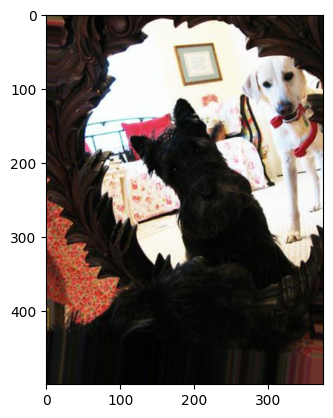

In [ ]:
plt.imshow(image_gen.random_transform(lab))

Loading all images from directories onto the model.

In [ ]:
image_gen.flow_from_directory(train_path)

Found 2384 images belonging to 20 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 354 images belonging to 20 classes.


In [ ]:
image_gen.flow_from_directory(val_path)

Found 677 images belonging to 20 classes.


# Creating The Model

This model is based on VGG16 structure with slight modifications.

VGG16 is very good at handling thousands of classes and images per class, both animals and objects.

Since I have 20 dog breed classes I thought it would be a good idea to base my model structure on VGG19.

Sadly I think I made the model way too big for this task.

**As you can see the training accuracy is very high but validation accuracy is low.**

The dataset I used had insufficient number of images for every dog breed and quite often images with different file formats.

I should have opted for model with 2 CNN layers and a different train-test-validation split, for example 50% of images could be used for test set, no validation set to resolve the issue with lack of data.


In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(20, activation='softmax'))

In [ ]:
from keras.optimizers import Adam, RMSprop
from keras.losses import categorical_crossentropy

Slow learning rate was better for learning - higher accuracy.
This rate is fast enough so that I could run the model several times during the day while it was adjusted.

In [ ]:
optimizer = Adam(learning_rate=1e-4)

In [ ]:
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 62, 62, 64)        0

In [ ]:
from keras.callbacks import EarlyStopping

Change stop to val accuracy, as validation loss does not change much throughout.

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
batch_size = 5


At first I had 64 classes for train, reduced to 20 classes, as test had only 20 classes, which  would throw graph execution error as logits size
would not match labels size.


Error was fixed by matching the number of classes for both train and test.

In [ ]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(image_width, image_height),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                                shuffle=True,
                                               class_mode='categorical')

Found 2384 images belonging to 20 classes.


In [ ]:
val_image_gen = image_gen.flow_from_directory(val_path,
                                               target_size=(image_width, image_height),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                                shuffle=True,
                                               class_mode='categorical')

Found 677 images belonging to 20 classes.


In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(image_width, image_height),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 354 images belonging to 20 classes.


In [ ]:
train_image_gen.class_indices

{'Afghan_Hound': 0,
 'American_Staffordshire_Terrier': 1,
 'Basenji': 2,
 'Bernese_Mountain_Dog': 3,
 'Border_Collie': 4,
 'Chihuahua': 5,
 'Chow_Chow': 6,
 'Dingo': 7,
 'Doberman': 8,
 'French_Bulldog': 9,
 'German_Shepherd': 10,
 'Golden_Retriever': 11,
 'Great_Dane': 12,
 'Kuvasz': 13,
 'Labrador_Retriever': 14,
 'Miniature_Poodle': 15,
 'Norwegian_Elkhound': 16,
 'Siberian_Husky': 17,
 'Toy_Poodle': 18,
 'Welsh_Springer_Spaniel': 19}

Wanted to use Adam optimizer over RMSprop as it has better accuracy.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Training My Model on Dog Images

I tried the following modifications while the model was training:


*   I tried batch normalization after every CNN layer - not much difference, cannot remove stride(2,2) throws an error, made model simpler, not much difference.
*   Tried adding more layers to the basic VGG16 sturcture - lower accuracy.

*   *reducing batch size - done, chosen batch size of 5 images - worked really well, high accuracy*

*   *adding dropout for all CNN layers, add dropout maybe after the Dense layer too - done, high training accuracy, helps to randomise the order of images fed to the model, slight fluctuations in the accuracy - shown on the graph*
*   remove early stop - done, model runs slower
*   add a bit more neurons - done, higher accuracy
L2 and L1 reg - higher error
* Making images bigger - much slower when it comes to learning
* Removing layers from VGG16 structure - more error, lower accuracy
* increased the number of epochs to 200 to allow the model to train sufficiently






In [ ]:
history = model.fit(train_image_gen, epochs=200,
                              validation_data=val_image_gen)

Epoch 1/200
477/477 [==============================] - 44s 92ms/step - loss: 0.8318 - accuracy: 0.7383 - val_loss: 2.0588 - val_accuracy: 0.4225
Epoch 2/200
477/477 [==============================] - 44s 91ms/step - loss: 0.8275 - accuracy: 0.7244 - val_loss: 2.1696 - val_accuracy: 0.4239
Epoch 3/200
477/477 [==============================] - 44s 93ms/step - loss: 0.7892 - accuracy: 0.7404 - val_loss: 2.2103 - val_accuracy: 0.4151
Epoch 4/200
477/477 [==============================] - 45s 94ms/step - loss: 0.8004 - accuracy: 0.7420 - val_loss: 2.1921 - val_accuracy: 0.4165
Epoch 5/200
477/477 [==============================] - 45s 94ms/step - loss: 0.8157 - accuracy: 0.7370 - val_loss: 2.1292 - val_accuracy: 0.4298
Epoch 6/200
477/477 [==============================] - 45s 94ms/step - loss: 0.8126 - accuracy: 0.7387 - val_loss: 2.1095 - val_accuracy: 0.4372
Epoch 7/200
477/477 [==============================] - 44s 93ms/step - loss: 0.7810 - accuracy: 0.7416 - val_loss: 2.2524 - val_ac

In [ ]:
from keras.models import load_model

In [ ]:
model.save('dogbreed_classifier_ver3_GoogleColab.h5')

In [ ]:
pred = model.predict(test_image_gen)

71/71 [==============================] - 5s 68ms/step


In [ ]:
acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss']

epochs = range(len(acc))

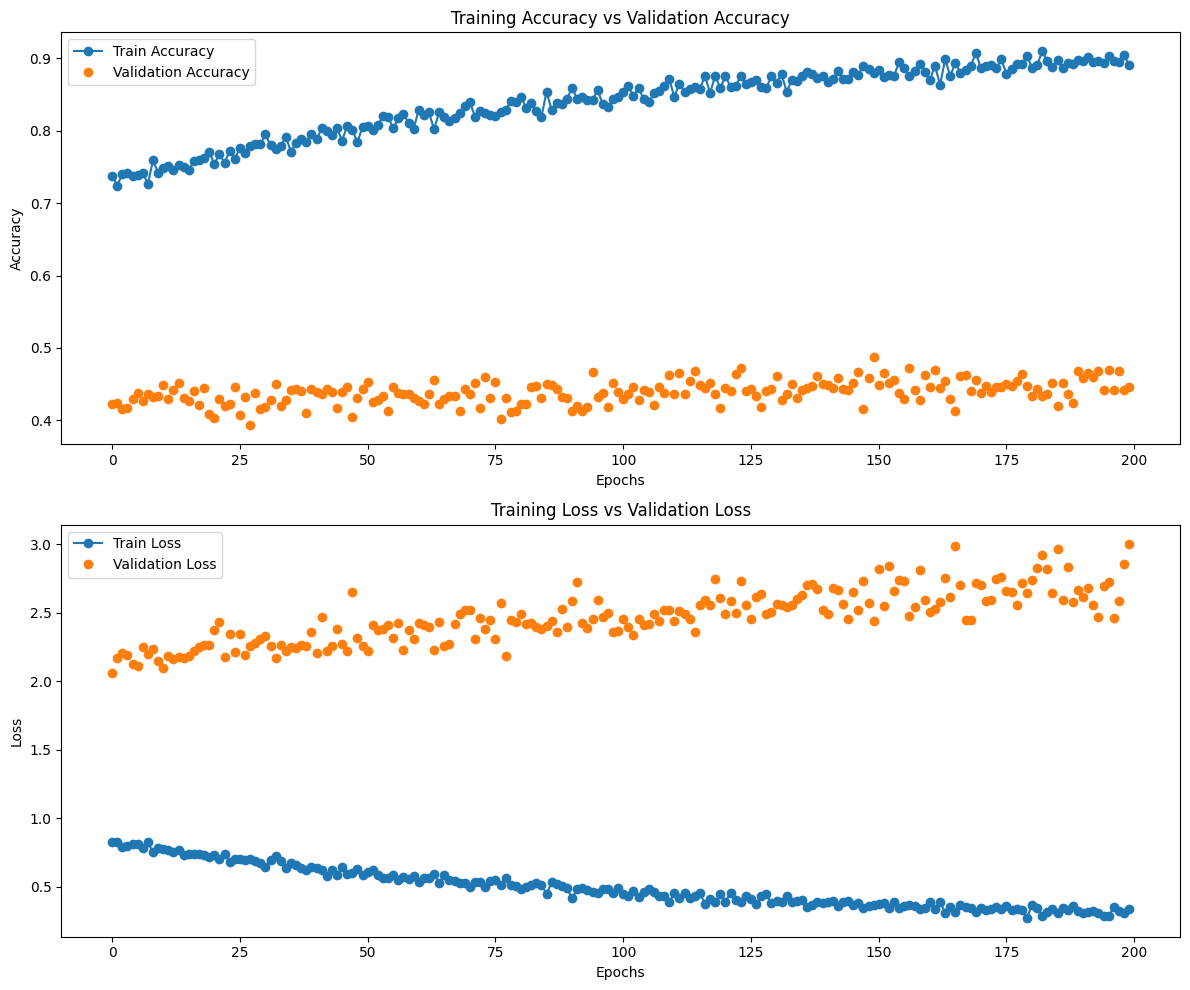

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].plot(acc, 'o-', label='Train Accuracy')
ax[0].plot(val_acc, 'o', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training Loss vs Validation Loss')
ax[1].plot(loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')


plt.tight_layout()
plt.show()

# Validating my model

I alidated my model in 2 ways: using the picture of my own dog and using popular metrics for CNN models such as confusion matrix.

In [ ]:
model.evaluate_generator(test_image_gen)

[2.694958448410034, 0.46045199036598206]

In [ ]:
test_loss, test_accuracy = model.evaluate(test_image_gen, batch_size=10)

71/71 [==============================] - 5s 68ms/step - loss: 2.6334 - accuracy: 0.4605


In [ ]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

In [ ]:
pred_probabilities = model.predict(test_image_gen)

In [ ]:
pred_probabilities

array([[8.0636943e-05, 7.3032240e-08, 1.2032332e-06, ..., 1.6526907e-06,
        3.1830642e-02, 3.1847421e-08],
       [1.9951037e-04, 5.6576625e-02, 6.6513853e-04, ..., 4.8695648e-07,
        5.3653363e-03, 1.4687308e-06],
       [6.2119059e-02, 8.1465496e-03, 1.3996956e-02, ..., 4.0718606e-03,
        1.8787439e-04, 4.5909901e-04],
       ...,
       [2.7818032e-04, 4.7222533e-05, 1.5894543e-06, ..., 5.5783999e-06,
        7.1613258e-03, 1.3266343e-07],
       [1.1609714e-08, 3.1379033e-02, 2.5354294e-10, ..., 2.8991160e-06,
        1.9978286e-06, 1.2517761e-11],
       [9.4964722e-04, 1.6323035e-04, 7.8278600e-07, ..., 3.6555223e-02,
        2.7418484e-03, 2.0195586e-04]], dtype=float32)

In [ ]:
test_image_gen.classes

Checking which predictions for test data set are true, didn't work.

In [ ]:
predictions = pred_probabilities > 0.5

In [ ]:
predictions

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
y_pred = np.argmax(pred, axis=1)
y_true = test_image_gen.classes

In [ ]:
print(confusion_matrix(y_true, y_pred))

[[2 2 3 1 2 0 3 0 1 0 1 0 0 2 0 1 0 3 2 2]
 [2 2 0 0 1 0 0 2 0 0 0 2 0 2 1 2 1 0 1 2]
 [2 0 1 2 0 0 1 1 1 0 0 0 1 6 0 4 1 1 1 0]
 [2 0 0 2 3 0 2 2 0 2 0 1 0 0 0 2 2 0 4 1]
 [0 2 0 1 2 0 0 1 0 2 0 0 0 2 2 0 0 0 1 2]
 [1 1 1 0 1 0 0 0 0 1 0 0 1 0 2 2 2 3 1 0]
 [1 0 0 2 1 2 2 0 3 2 0 0 0 1 1 2 0 0 2 1]
 [0 1 0 0 0 0 3 0 0 0 0 0 0 2 2 1 2 0 3 2]
 [2 0 1 1 1 0 1 0 0 0 1 1 1 0 0 3 0 1 2 0]
 [0 0 1 0 1 0 0 0 1 1 0 2 0 1 0 4 5 1 0 0]
 [1 1 0 1 2 0 3 0 0 0 2 0 0 1 0 3 2 0 0 0]
 [0 2 0 0 1 0 2 0 3 0 0 0 0 1 2 1 2 0 0 1]
 [0 1 0 3 0 0 1 2 0 0 0 0 0 1 1 4 0 1 1 1]
 [2 0 1 1 1 0 3 1 0 0 0 0 0 1 1 0 1 1 2 0]
 [0 1 0 5 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 2]
 [1 1 2 2 2 0 0 0 0 0 0 0 0 3 1 1 1 1 0 1]
 [1 3 2 2 2 0 0 0 0 0 1 0 0 1 0 3 0 0 4 1]
 [1 1 2 0 1 0 2 0 1 1 0 2 0 1 0 2 1 2 2 1]
 [1 0 3 0 1 0 2 1 0 1 0 0 0 0 2 1 1 1 1 1]
 [2 0 1 1 2 0 1 0 0 1 0 0 1 1 0 3 0 2 0 0]]


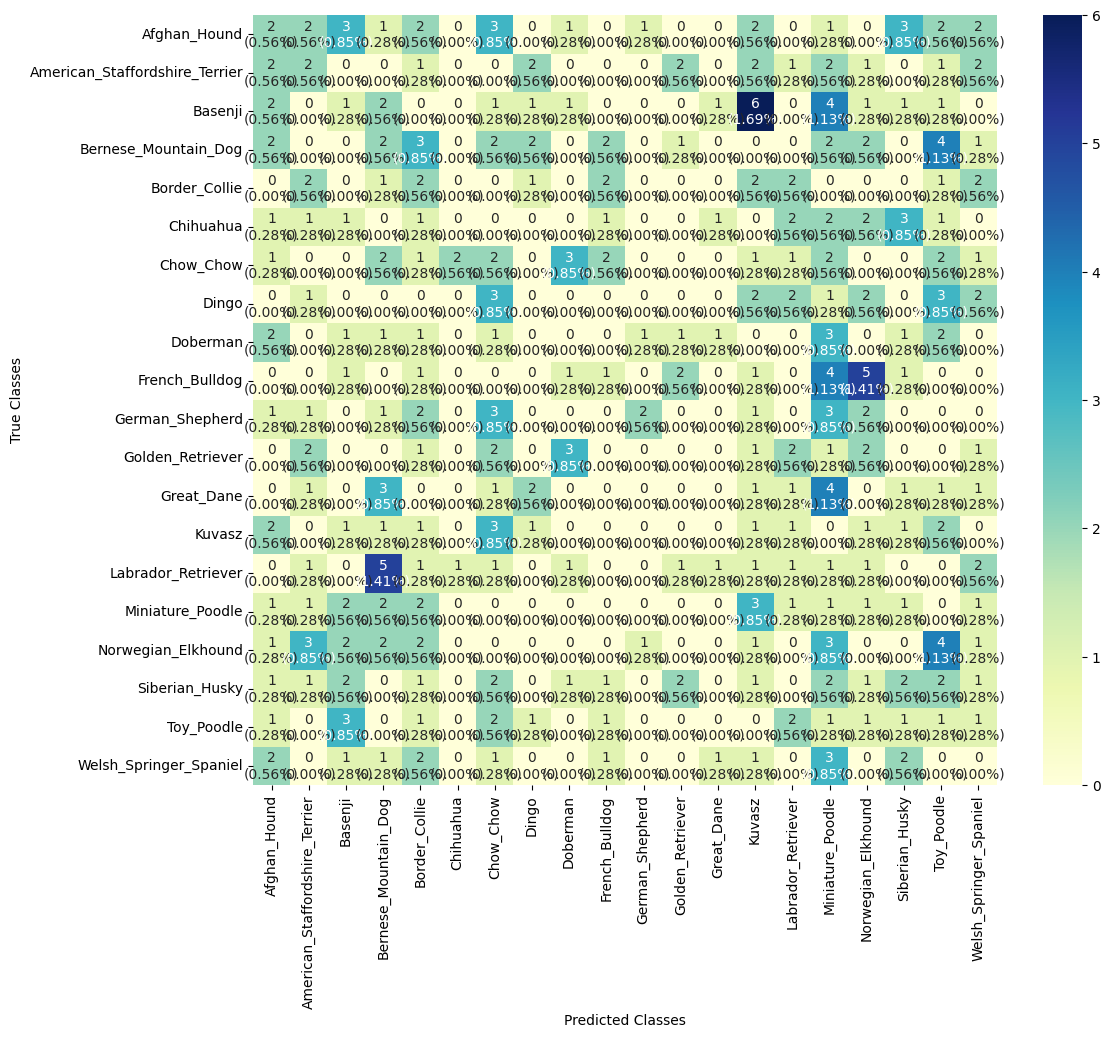

In [ ]:
cf_mtx = confusion_matrix(y_true, y_pred)

group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(20, 20)

plt.figure(figsize = (12, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [ ]:
labels = {value: key for key, value in train_image_gen.class_indices.items()}

In [ ]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

Using the new unseen image of my own dog and seeing if the model would classify its breed correctly.

The image had to be scaled to be same size as the images used for training my model.


Then transforming the image into rgb mode and numpy array, normalizing by dividing the array by 255 - same transformation used on images loaded into the model during training.

In [ ]:
my_lab_dir = '/content/mylab_pred2.jpg'

In [ ]:
from keras.preprocessing.image import load_img

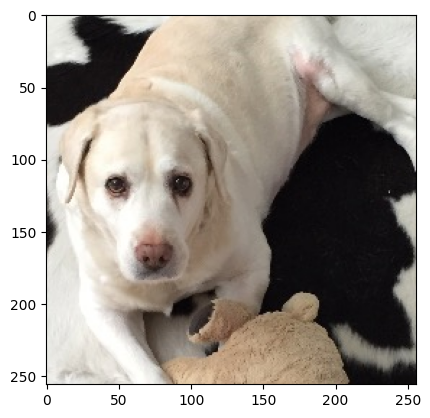

In [ ]:
my_lab = plt.imread(my_lab_dir)
plt.imshow(my_lab)

In [ ]:
my_lab.shape

(256, 256, 3)

In [ ]:
from PIL import Image
from numpy import asarray

In [ ]:
from keras.preprocessing.image import load_img

In [ ]:
test_image = load_img(my_lab_dir, color_mode='rgb' )

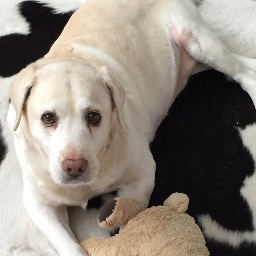

In [ ]:
test_image

In [ ]:
numpydata = asarray(test_image)

In [ ]:
numpydata.shape

(256, 256, 3)

In [ ]:
my_image_arr = np.expand_dims(numpydata, axis=0)

In [ ]:
my_image_arr.shape

(1, 256, 256, 3)

In [ ]:
my_image_arr = my_image_arr/255

In [ ]:
my_image_arr

array([[[[0.94117647, 0.95294118, 0.9254902 ],
         [0.94117647, 0.95294118, 0.9254902 ],
         [0.9372549 , 0.94901961, 0.92156863],
         ...,
         [0.72941176, 0.73333333, 0.70980392],
         [0.69411765, 0.69803922, 0.6745098 ],
         [0.78039216, 0.78431373, 0.76078431]],

        [[0.94117647, 0.95294118, 0.9254902 ],
         [0.94117647, 0.95294118, 0.9254902 ],
         [0.94117647, 0.95294118, 0.9254902 ],
         ...,
         [0.81960784, 0.82352941, 0.8       ],
         [0.81568627, 0.81960784, 0.79607843],
         [0.83529412, 0.83921569, 0.81568627]],

        [[0.94117647, 0.95294118, 0.9254902 ],
         [0.94117647, 0.95294118, 0.9254902 ],
         [0.94117647, 0.95294118, 0.9254902 ],
         ...,
         [0.87058824, 0.8745098 , 0.85098039],
         [0.8745098 , 0.87843137, 0.85490196],
         [0.8627451 , 0.86666667, 0.84313725]],

        ...,

        [[0.90588235, 0.90980392, 0.89019608],
         [0.90588235, 0.90980392, 0.89019608]

In [ ]:
model.predict(my_image_arr)

1/1 [==============================] - 0s 18ms/step


array([[2.7815510e-09, 2.6606804e-07, 9.9336240e-13, 1.3452971e-15,
        1.1000260e-12, 1.9584633e-08, 3.1703695e-07, 4.4352300e-11,
        1.7092869e-12, 8.6445783e-07, 3.3186133e-13, 2.7160829e-07,
        1.1061123e-09, 1.4995347e-03, 6.0008015e-03, 8.2781810e-01,
        1.2827346e-11, 6.6660713e-12, 1.6467981e-01, 1.0481707e-14]],
      dtype=float32)

In [ ]:
(model.predict(my_image_arr > 0.5))

1/1 [==============================] - 0s 18ms/step


array([[5.0107473e-16, 5.2137071e-05, 3.7174404e-03, 1.1907490e-13,
        3.2089612e-18, 1.0757945e-01, 8.8809443e-01, 4.8475230e-12,
        1.2644863e-09, 4.8898743e-04, 2.5648981e-16, 1.5327393e-07,
        3.9435066e-11, 1.5521451e-06, 5.1891501e-08, 1.1962525e-05,
        1.4685735e-21, 5.3575004e-05, 7.5676432e-08, 1.9350637e-07]],
      dtype=float32)

In [ ]:
score = tf.nn.softmax(model.predict(my_image_arr))

1/1 [==============================] - 0s 18ms/step


In [ ]:
score

<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[0.04656608, 0.0465661 , 0.04656608, 0.04656608, 0.04656608,
        0.04656608, 0.0465661 , 0.04656608, 0.04656608, 0.04656613,
        0.04656608, 0.0465661 , 0.04656608, 0.04663597, 0.04684636,
        0.10655812, 0.04656608, 0.04656608, 0.05490214, 0.04656608]],
      dtype=float32)>

In [ ]:
np.argmax(score)

15

In [ ]:
print(test_image_gen.class_indices)

{'Afghan_hound': 0, 'American_Staffordshire_Terrier': 1, 'Basenji': 2, 'Bernese_Mountain_Dog': 3, 'Border_Collie': 4, 'Chihuahua': 5, 'Chow_Chow': 6, 'Dingo': 7, 'Doberman': 8, 'French_Bulldog': 9, 'German_Shepherd': 10, 'Golden_Retriever': 11, 'Great_Dane': 12, 'Kuvasz': 13, 'Labrador_Retriever': 14, 'Miniature_Poodle': 15, 'Norwegian_Elkhound': 16, 'Siberian_Husky': 17, 'Toy_Poodle': 18, 'Welsh_Springer_Spaniel': 19}


My model classified my dog as 'Miniature_Poodle' which is incorrect.

My dog is a very obvious example of a 'Labrador_Retriever', which humans can easily tell even if they don't know dog breeds very well.


*Mission failed - until next time.*